## 1. Load the fashion mnist dataset

In [2]:
import tensorflow as tf
from tensorflow import keras
# load fashion mnist dataset
data = keras.datasets.fashion_mnist
#train test split
(X_trainval, y_trainval), (X_test, y_test) = data.load_data()

In [3]:
X_trainval.shape, y_trainval.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [5]:
X_trainval = X_trainval.astype('float32')
X_test = X_test.astype('float32')
X_trainval /= 255       
X_test /= 255        
print(X_trainval.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


### - show the classes and add class names

In [6]:
#classes of the dataset
np.unique(y_trainval)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
#define class names
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

### - show five samples in each class (totally 50 images)

In [8]:
#get the index of 50 samples in which 5 is from each class.
list_of_index = [];
for x in range(10):
    i = 0;
    j = 0;
    while j < 5:
        if y_trainval[i] == x:
            list_of_index.append(i)
            i += 1;
            j +=1;
        else:
            i += 1;   
print(list_of_index)

[1, 2, 4, 10, 17, 16, 21, 38, 69, 71, 5, 7, 27, 37, 45, 3, 20, 25, 31, 47, 19, 22, 24, 28, 29, 8, 9, 12, 13, 30, 18, 32, 33, 39, 40, 6, 14, 41, 46, 52, 23, 35, 57, 99, 100, 0, 11, 15, 42, 44]


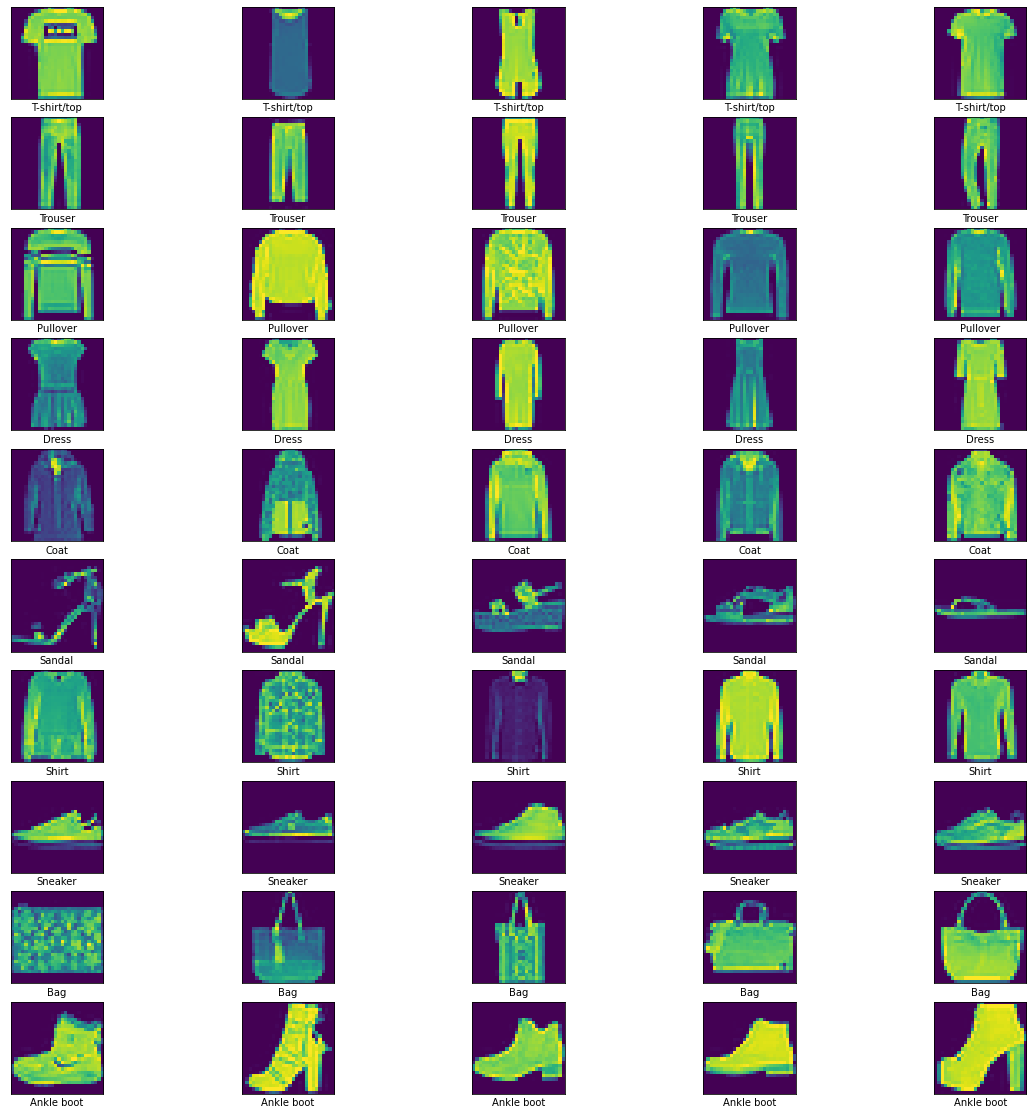

In [9]:
#plot 50 images - five samples from each class
plt.figure(figsize=(20,20))
for i in list_of_index:
    plt.subplot(10,5, list_of_index.index(i) +1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.figure
    plt.imshow(X_trainval[i])
    plt.xlabel(class_names[y_trainval[i]])
plt.show()

## 2. 'Vanilla' model

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import mnist
from tensorflow import keras

In [11]:
X_trainval = X_trainval.reshape(60000, 784)  
X_test = X_test.reshape(10000, 784)     

num_classes =  10

y_trainval = keras.utils.to_categorical(y_trainval, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
# take a sample from training set with sample size = 6000
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval,stratify=y_trainval,test_size = 0.1,random_state=0)

In [13]:
print(X_train.shape, 'X_train size')
print(y_train.shape, 'y_train size')

(54000, 784) X_train size
(54000, 10) y_train size


In [14]:
#build the vanilla model
model1 = keras.Sequential([        
    Dense(1024, input_shape=(784,), activation='relu'),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax'),
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [15]:
model1.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, batch_size=128,
                    epochs=20, verbose=1, validation_split=.1)

Epoch 1/20
380/380 [==============================] - 15s 36ms/step - loss: 0.4854 - accuracy: 0.8248 - val_loss: 0.3831 - val_accuracy: 0.8613
Epoch 2/20
380/380 [==============================] - 15s 40ms/step - loss: 0.3548 - accuracy: 0.8693 - val_loss: 0.3551 - val_accuracy: 0.8770
Epoch 3/20
380/380 [==============================] - 16s 42ms/step - loss: 0.3216 - accuracy: 0.8806 - val_loss: 0.3348 - val_accuracy: 0.8778
Epoch 4/20
380/380 [==============================] - 13s 33ms/step - loss: 0.2954 - accuracy: 0.8879 - val_loss: 0.3037 - val_accuracy: 0.8900
Epoch 5/20
380/380 [==============================] - 11s 29ms/step - loss: 0.2795 - accuracy: 0.8944 - val_loss: 0.3398 - val_accuracy: 0.8763
Epoch 6/20
380/380 [==============================] - 17s 44ms/step - loss: 0.2614 - accuracy: 0.9011 - val_loss: 0.3126 - val_accuracy: 0.8848
Epoch 7/20
380/380 [==============================] - 23s 62ms/step - loss: 0.2521 - accuracy: 0.9062 - val_loss: 0.3058 - val_accuracy:

In [16]:
pd.DataFrame(history1.history)

,loss,accuracy,val_loss,val_accuracy
0,0.485447,0.824774,0.383138,0.861296
1,0.354828,0.869321,0.355121,0.877037
2,0.321650,0.880617,0.334773,0.877778
3,0.295440,0.887922,0.303686,0.890000
4,0.279488,0.894362,0.339770,0.876296
5,0.261406,0.901091,0.312648,0.884815
6,0.252122,0.906193,0.305813,0.891667
7,0.239238,0.908992,0.327328,0.884074
8,0.224785,0.913498,0.305493,0.895000
9,0.213916,0.918519,0.311091,0.895000


Text(0, 0.5, 'loss')

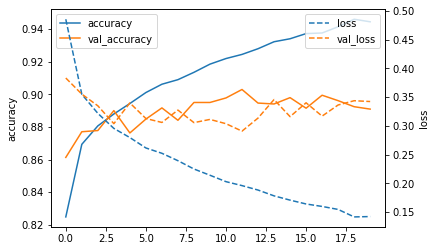

In [17]:
df = pd.DataFrame(history1.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [18]:
score = model1.evaluate(X_val, y_val, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.361
Test Accuracy: 0.897


## 3. Use drop-out

In [19]:
from keras.layers import Dropout

model_dropout = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dropout(.5), 
    Dense(1024, activation='relu'),
    Dropout(.5), 
    Dense(10, activation='softmax'), 
])

model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1024)              803840    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                10250     
                                                                 
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

history2 = model_dropout.fit(X_train, y_train, batch_size=128,
                    epochs=20, verbose=1, validation_split=.1)

Epoch 1/20
380/380 [==============================] - 18s 47ms/step - loss: 0.5992 - accuracy: 0.7823 - val_loss: 0.4525 - val_accuracy: 0.8320
Epoch 2/20
380/380 [==============================] - 12s 32ms/step - loss: 0.4531 - accuracy: 0.8343 - val_loss: 0.3966 - val_accuracy: 0.8543
Epoch 3/20
380/380 [==============================] - 20s 54ms/step - loss: 0.4231 - accuracy: 0.8455 - val_loss: 0.3713 - val_accuracy: 0.8672
Epoch 4/20
380/380 [==============================] - 24s 62ms/step - loss: 0.3974 - accuracy: 0.8537 - val_loss: 0.3515 - val_accuracy: 0.8693
Epoch 5/20
380/380 [==============================] - 21s 54ms/step - loss: 0.3873 - accuracy: 0.8573 - val_loss: 0.3548 - val_accuracy: 0.8748
Epoch 6/20
380/380 [==============================] - 21s 56ms/step - loss: 0.3736 - accuracy: 0.8626 - val_loss: 0.3427 - val_accuracy: 0.8719
Epoch 7/20
380/380 [==============================] - 18s 48ms/step - loss: 0.3633 - accuracy: 0.8671 - val_loss: 0.3399 - val_accuracy:

In [21]:
pd.DataFrame(history2.history)

,loss,accuracy,val_loss,val_accuracy
0,0.599205,0.782346,0.452504,0.832037
1,0.453126,0.834342,0.396616,0.854259
2,0.423105,0.845453,0.371295,0.867222
3,0.397359,0.853724,0.351513,0.869259
4,0.387300,0.857325,0.354768,0.874815
5,0.373560,0.862551,0.342684,0.871852
6,0.363310,0.867058,0.339885,0.875185
7,0.356573,0.867798,0.359625,0.863889
8,0.346474,0.872202,0.337088,0.884815
9,0.345618,0.873436,0.325213,0.883519


Text(0, 0.5, 'loss')

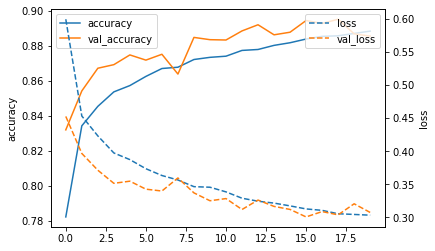

In [22]:
df = pd.DataFrame(history2.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [23]:
score = model_dropout.evaluate(X_val, y_val, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.301
Test Accuracy: 0.891


## 4. Use batch normalization

In [24]:
from keras.layers import BatchNormalization

model_bn = Sequential([
    Dense(1024, input_shape=(784,)),
    BatchNormalization(), 
    Activation("relu"),
    Dense(1024),
    BatchNormalization(), 
    Activation("relu"),
    Dense(10, activation='softmax'), 
])

model_bn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              803840    
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 1024)              1049600   
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 1024)             

In [25]:
model_bn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

history3 = model_bn.fit(X_train, y_train, batch_size=128,
                    epochs=20, verbose=1, validation_split=.1)

Epoch 1/20
380/380 [==============================] - 21s 51ms/step - loss: 0.4546 - accuracy: 0.8349 - val_loss: 0.4205 - val_accuracy: 0.8496
Epoch 2/20
380/380 [==============================] - 16s 43ms/step - loss: 0.3302 - accuracy: 0.8770 - val_loss: 0.3778 - val_accuracy: 0.8604
Epoch 3/20
380/380 [==============================] - 16s 42ms/step - loss: 0.2876 - accuracy: 0.8934 - val_loss: 0.3252 - val_accuracy: 0.8806
Epoch 4/20
380/380 [==============================] - 15s 40ms/step - loss: 0.2618 - accuracy: 0.9000 - val_loss: 0.4101 - val_accuracy: 0.8543
Epoch 5/20
380/380 [==============================] - 12s 33ms/step - loss: 0.2380 - accuracy: 0.9103 - val_loss: 0.4000 - val_accuracy: 0.8665
Epoch 6/20
380/380 [==============================] - 13s 33ms/step - loss: 0.2163 - accuracy: 0.9186 - val_loss: 0.3495 - val_accuracy: 0.8724
Epoch 7/20
380/380 [==============================] - 12s 32ms/step - loss: 0.1983 - accuracy: 0.9253 - val_loss: 0.4201 - val_accuracy:

In [26]:
pd.DataFrame(history3.history)

,loss,accuracy,val_loss,val_accuracy
0,0.454617,0.834856,0.420499,0.849630
1,0.330171,0.877016,0.377792,0.860370
2,0.287609,0.893354,0.325159,0.880556
3,0.261799,0.899979,0.410132,0.854259
4,0.237975,0.910267,0.400023,0.866481
5,0.216336,0.918560,0.349536,0.872407
6,0.198264,0.925350,0.420073,0.859815
7,0.183216,0.930123,0.339017,0.885185
8,0.169576,0.936070,0.323889,0.890926
9,0.156647,0.940720,0.403111,0.875000


Text(0, 0.5, 'loss')

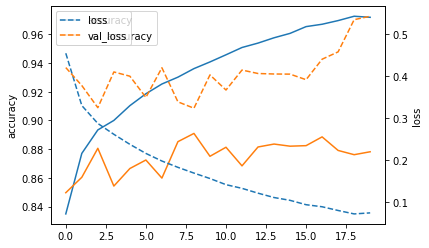

In [27]:
df = pd.DataFrame(history3.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [28]:
score = model_bn.evaluate(X_val, y_val, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.498
Test Accuracy: 0.879


#### Vanilla model has the best performance on test set.

### - Best model's performance on test set

In [29]:
#retrain the model using trainval
model1.fit(X_trainval,y_trainval)

1875/1875 [==============================] - 45s 24ms/step - loss: 0.2725 - accuracy: 0.8997


In [30]:
score = model1.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.344
Test Accuracy: 0.886
